In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import lovelyplots as lp
from lovelyplots.utils import set_retina
from matplotlib.ticker import AutoMinorLocator
from util.fig import set_size
import numpy as np

In [2]:
set_retina()
dpi = 150
plot_config = {
    "figure.dpi": dpi,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.monospace": ["JetBrains Mono"],
    "font.size": 5,
    "figure.titlesize": 6,
    "figure.titleweight": "bold",
    # axes
    "axes.labelsize": 5,
    "axes.titlesize": 6,
    "axes.titleweight": "bold",
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 5,
    "xtick.labelsize": 5,
    "ytick.labelsize": 5,
    # Grid lines
    "axes.edgecolor": "black",
    # "axes.facecolor": "f5f5f5",
    "axes.grid": True,
    "axes.grid.which": "both",
    "axes.spines.left": True,
    "axes.spines.right": True,
    "axes.spines.top": True,
    "axes.spines.bottom": True,
    "xtick.major.bottom": True,
    "xtick.minor.bottom": True,
    "ytick.major.left": True,
    "ytick.minor.left": True,
}

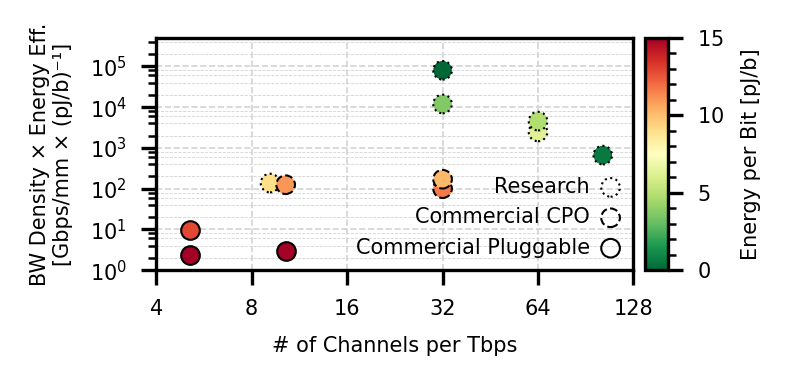

In [6]:
# Energy bandwidth plot

# pJ/b and Gbps data base: each row is different paper source
data = np.array(
    [  # # of lanes per fiber, Gbps/lane, Gbps/mm (unidirectional), Gbps/PIC, pJ/b, technology, commercial/reserach
        [64, 32, 8063, 51200, 0.1, "dwdm", "research"], # target
        # [128, 32, 10750, 65536, 0.2, "dwdm", "research"], # target
        [64, 32, 4045, 32768, 0.337, "dwdm", "research"],  # Wang et al. IEEE TCPMT 2024
        [64, 16, 2023, 16384, 0.818, "dwdm", "research"],  # Wang et al. IEEE CICC 2024
        [4, 10, 80, 800, 0.12, "dwdm", "research"], # Stu Nature
        [64, 16, 2275, 1024, 0.5, "dwdm", "research"], # Anthony petabit
        [2, 112, 275, 3584, 2, "pam-4", "research"],  # IBM, 2021
        [16, 32, 500, 8192, 5, "dwdm", "commercial cpo"],  # AyarLabs, 2024
        [8, 32, 512, 2048, 3, "dwdm", "commercial cpo"],  # Intel, 2024
        [8, 100, 500, 6400, 4, "pam-4", "commercial cpo"],  # Ranovos, 2024
        [4, 200, 35.4, 800, 15, "pam-4", "pluggable"],  # Innolight, 2024
        [8, 100, 43.6, 800, 15, "pam-4", "pluggable"],  # Innolight, 2024
        [8, 200, 70.9, 1600, 7.5, "pam-4", "pluggable"],  # Innolight, 2024
        # [4, 100, 21.7, 400, 30, "pam-4", "pluggable"],  # Innolight, 2024
    ]
)
# fom is Gbps/mm (unidirectional) over pJ/b
fom = data[:, 2].astype(float) / data[:, 4].astype(float)

# plot width
height = 1.095
width = 2.44
ratio = height / width

# colormap based on Gbps/ch range data[:, 4]
cmap = plt.get_cmap("RdYlGn_r")
# cmap = plt.get_cmap("turbo")
# cmap = plt.get_cmap("PiYG_r")
# cmap = plt.get_cmap("jet_r")

with plt.style.context(["nature", "colors5", "use_mathtext"]):
    plt.rcParams.update(plot_config)
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=set_size(width * 72, ratio=ratio, subplots=(1, 1)),
        dpi=dpi,
        constrained_layout=False,
    )
    for i, d in enumerate(data):
        ax.scatter(
            np.log2(1024 / float(d[1])),  # number of channels per 1 Tbps
            fom[i],
            marker="o",
            edgecolor="black",
            linewidth=0.5,
            linestyle=(
                "-"
                if d[6] == "pluggable"
                else "--" if d[6] == "commercial cpo" else ":"
            ),
            c=float(d[4]),
            cmap=cmap,
            norm=mpl.colors.LogNorm(
                vmin=np.min(data[:, 4].astype(float)),
                vmax=np.max(data[:, 4].astype(float)),
            ),
            label=(
                "Commercial Pluggable"
                if d[6] == "pluggable"
                else "Commercial CPO" if d[6] == "commercial cpo" else "Research"
            ),
            s=20,
        )
    # set title
    # ax.set_title("Link Design Space")
    # x axis ticks labeled as 2^x
    ax.set_xticks(np.log2([4, 8, 16, 32, 64, 128]))
    ax.set_xticklabels([4, 8, 16, 32, 64, 128])
    # ax.xaxis.set_label_position("top")
    # ax.xaxis.tick_top()
    # y axis log scale
    ax.set_yscale("log")
    ax.set_ylim(1, 500000)
    # major and minor ticks
    ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0, numticks=15))
    ax.yaxis.set_minor_locator(mpl.ticker.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=15))
    # ax.yaxis.set_label_position("right")
    # ax.yaxis.tick_right()

    ax.set_xlabel("# of Channels per Tbps")
    ax.set_ylabel("BW Density × Energy Eff.\n[Gbps/mm × (pJ/b)⁻¹]")
    ax.grid(which="both", color="lightgray", linestyle="--")
    ax.grid(which="major", linewidth=0.4)
    ax.grid(which="minor", linewidth=0.2)
    ax.set_axisbelow(True)

    # ax.ticklabel_format(useOffset=False, style="plain")
    # Add legend, ignore duplicate labels
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    lg = ax.legend(
        by_label.values(),
        by_label.keys(),
        reverse=False,
        frameon=False,
        loc="lower right",
        markerfirst=False,
        handletextpad=0.5,
        handlelength=1.0,
        borderpad=0.4,
        borderaxespad=0.2,
    )
    lg.get_frame().set_linewidth(0.5)
    # Remove marker face color from legend
    for lh in ax.get_legend().legend_handles:
        lh.set(facecolor="none")
        lh.set(sizes=[20])
    # text alignment in legend
    for text in lg.get_texts():
        text.set_va("baseline")
    # Add a colorbar
    sm = plt.cm.ScalarMappable(
        cmap=cmap,
        norm=mpl.colors.Normalize(
            vmin=0, vmax=15
        ),
    )
    sm.set_array([])
    cbar = plt.colorbar(
        sm, ax=ax, orientation="vertical", pad=0.02, aspect=10, location="right"
    )
    cbar.set_ticks([0, 5, 10, 15])
    cbar.ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    # do not use scientific notation
    cbar.formatter.set_scientific(False)
    cbar.set_label("Energy per Bit [pJ/b]")
    # cbar.ax.set_title("FOM")
    # Save the figure
    plt.tight_layout(pad=0)
    plt.savefig(
        "bandwidth_energy.svg",
        dpi=dpi,
        transparent=True,
        pad_inches=0,
        bbox_inches="tight",
    )

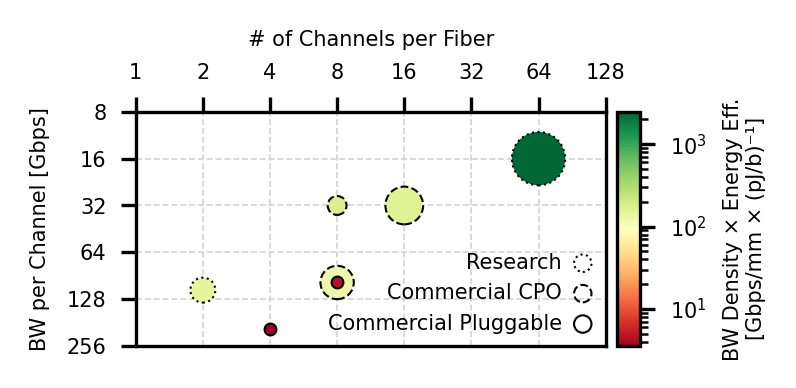

In [ ]:
# Energy bandwidth plot

# pJ/b and Gbps data base: each row is different paper source
data = np.array(
    [  # # of lanes per fiber, Gbps/lane, Gbps/mm (unidirectional), Gbps/PIC, pJ/b, technology, commercial/reserach
        [64, 32, 4045, 32768, 0.337, "dwdm", "research"],  # Wang et al. IEEE TCPMT 2024
        [64, 16, 2023, 16384, 0.818, "dwdm", "research"],  # Wang et al. IEEE CICC 2024
        [2, 112, 275, 3584, 2, "pam-4", "research"],  # IBM, 2021
        [16, 32, 800, 8192, 5, "dwdm", "commercial cpo"],  # AyarLabs, 2024
        [8, 32, 512, 2048, 3, "dwdm", "commercial cpo"],  # Intel, 2024
        [8, 100, 500, 6400, 4, "pam-4", "commercial cpo"],  # Ranovos, 2024
        [4, 200, 35.4, 800, 10, "pam-4", "pluggable"],  # Innolight, 2024
        [8, 100, 43.6, 800, 10, "pam-4", "pluggable"],  # Innolight, 2024
    ]
)
# fom is Gbps/mm (unidirectional) over pJ/b
fom = data[:, 2].astype(float) / data[:, 4].astype(float)

# plot width
height = 1.095
width = 2.44
ratio = height / width

# colormap based on Gbps/ch range data[:, 4]
cmap = plt.get_cmap("RdYlGn")
# cmap = plt.get_cmap("PiYG")
# cmap = plt.get_cmap("jet_r")

with plt.style.context(["nature", "colors5", "use_mathtext"]):
    plt.rcParams.update(plot_config)
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=set_size(width * 72, ratio=ratio, subplots=(1, 1)),
        dpi=dpi,
        constrained_layout=False,
    )
    for i, d in enumerate(data):
        # plot a scatter point such that:
        # x-axis is log2(# of channels per fiber)
        # y-axis is log2(Gbps/lane)
        # marker is a circle such that:
        # face color is mapped to the fom in log scale
        # edge color is black solid line if commercial pluggable, black dashed line if commercial CPO, or black dotted line if research
        # size is mapped to the Gbps/PIC
        ax.scatter(
            np.log2(float(d[0])),
            np.log2(float(d[1])),
            marker="o",
            edgecolor="black",
            linewidth=0.5,
            linestyle=(
                "-"
                if d[6] == "pluggable"
                else "--" if d[6] == "commercial cpo" else ":"
            ),
            c=fom[i],
            cmap=cmap,
            norm=mpl.colors.LogNorm(vmin=fom.min(), vmax=fom.max()),
            label=(
                "Commercial Pluggable"
                if d[6] == "pluggable"
                else "Commercial CPO" if d[6] == "commercial cpo" else "Research"
            ),
            s=float(d[3]) / 100,
        )
    # set title
    # ax.set_title("Link Design Space")
    # x axis ticks labeled as 2^x
    ax.set_xticks(np.log2([1, 2, 4, 8, 16, 32, 64, 128]))
    ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64, 128])
    ax.xaxis.set_label_position("top")
    ax.xaxis.tick_top()
    # y axis ticks labeled as 2^x
    ax.set_yticks(np.log2([8, 16, 32, 64, 128, 256]))
    ax.set_yticklabels([8, 16, 32, 64, 128, 256])
    ax.invert_yaxis()
    # ax.yaxis.set_label_position("right")
    # ax.yaxis.tick_right()   

    ax.set_xlabel("# of Channels per Fiber")
    ax.set_ylabel("BW per Channel [Gbps]")
    ax.grid(which="both", color="lightgray", linestyle="--")
    ax.grid(which="major", linewidth=0.4)
    ax.grid(which="minor", linewidth=0.2)
    ax.set_axisbelow(True)

    # ax.ticklabel_format(useOffset=False, style="plain")
    # Add legend, ignore duplicate labels
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    lg = ax.legend(
        by_label.values(),
        by_label.keys(),
        reverse=False,
        frameon=False,
        loc="lower right",
        markerfirst=False,
        handletextpad=0.5,
        handlelength=1.0,
        borderpad=0.4,
        borderaxespad=0.2,
    )
    lg.get_frame().set_linewidth(0.5)
    # Remove marker face color from legend
    for lh in ax.get_legend().legend_handles:
        lh.set(facecolor="none")
        lh.set(sizes=[17.5])
    # text alignment in legend
    for text in lg.get_texts():
        text.set_va("baseline")
    # Add a colorbar to match the LogNorm
    sm = plt.cm.ScalarMappable(
        cmap=cmap, norm=mpl.colors.LogNorm(vmin=fom.min(), vmax=fom.max())
    )
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation="vertical", pad=0.02, aspect=10, location="right")
    cbar.set_label("BW Density × Energy Eff.\n[Gbps/mm × (pJ/b)⁻¹]")
    # cbar.ax.set_title("FOM")
    # Save the figure
    plt.tight_layout(pad=0)
    plt.savefig(
        "bandwidth_energy.svg",
        dpi=dpi,
        transparent=True,
        pad_inches=0,
        bbox_inches="tight",
    )